# LDA vs PCA en MNIST

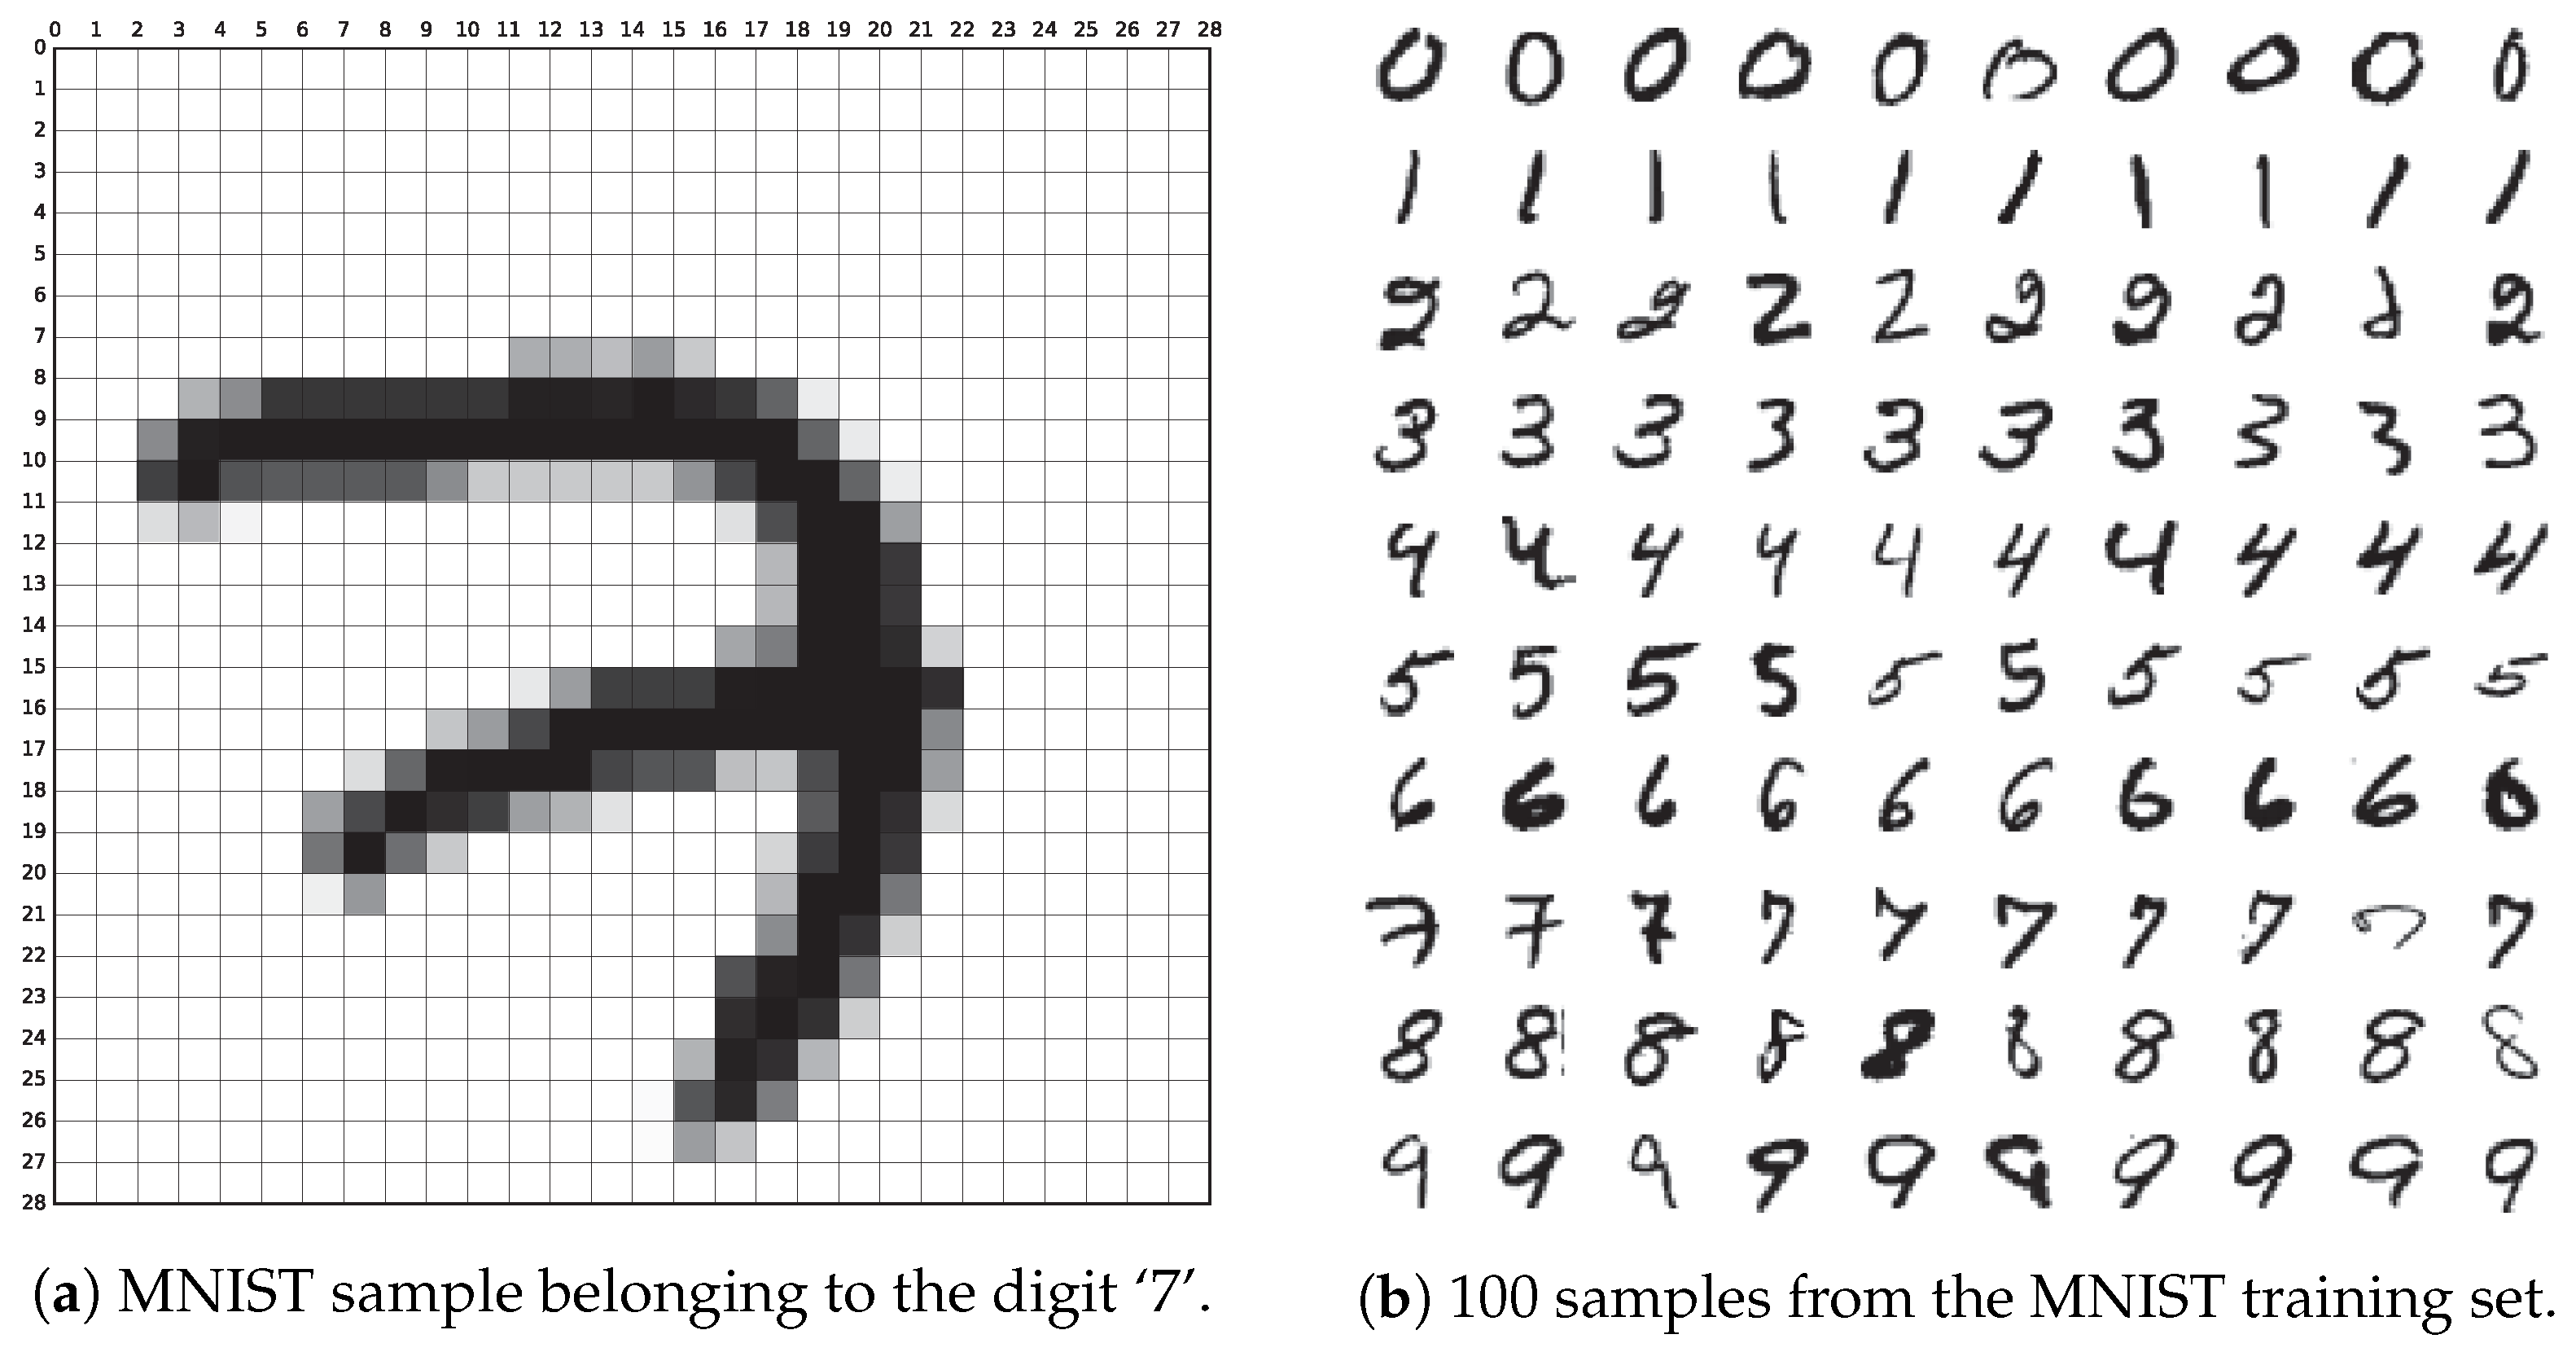

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

Cargamos el dataset

In [ ]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

Normalizamos los datos (PCA es sensible a escala)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Aplicar PCA (reducción a 2D)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Aplicar LDA (reducción a 2D)

In [ ]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

Graficamos los resultados

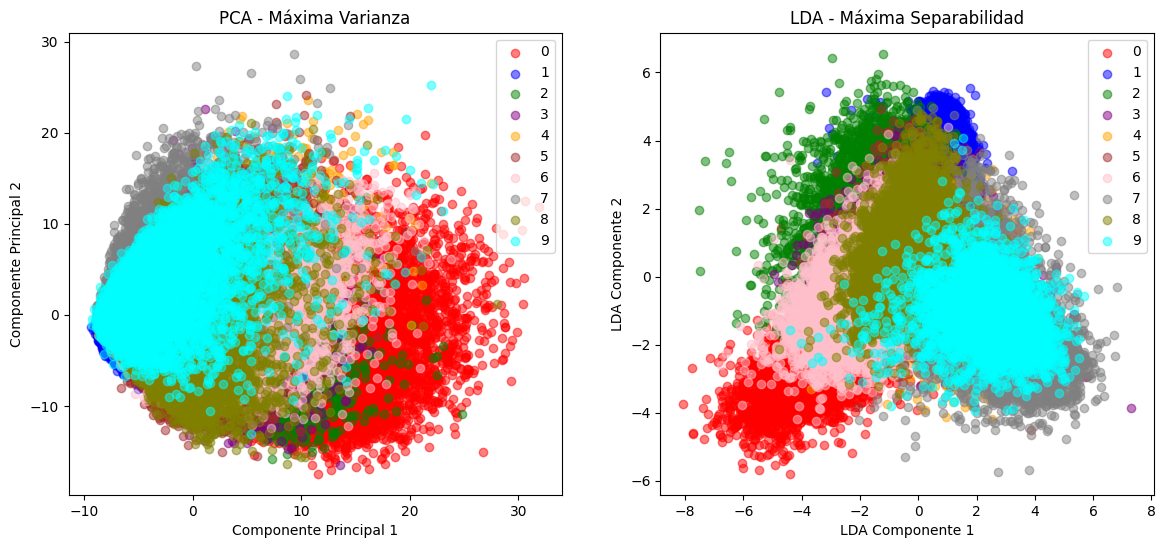

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

#Para PCA
for i in range(10):
    mask = y == i
    axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], label=str(i), alpha=0.5, color=colors[i])
axes[0].set_title("PCA - Máxima Varianza")
axes[0].set_xlabel("Componente Principal 1")
axes[0].set_ylabel("Componente Principal 2")
axes[0].legend()

#Para LDA
for i in range(10):
    mask = y == i
    axes[1].scatter(X_lda[mask, 0], X_lda[mask, 1], label=str(i), alpha=0.5, color=colors[i])
axes[1].set_title("LDA - Máxima Separabilidad")
axes[1].set_xlabel("LDA Componente 1")
axes[1].set_ylabel("LDA Componente 2")
axes[1].legend()

plt.show()